# Tratamento de água

#### Importando bibliotecas, conjunto de dados e informações

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\Pichau\Desktop\Jupyter programs\water treatment plant\water-treatment.data.csv',names=range(0,39))

## Os títulos dos atributos foram deixados como números para deixar a vizualização mais compacta. 
## No arquivo de informações abaixo há uma legenda sobre o significado de cada um.

In [26]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,target
0,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,7.9,...,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6,1
1,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,7.7,...,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0,1
2,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,7.7,...,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5,1
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0,1
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,...,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5,1


In [25]:
infos = open(r'C:\Users\Pichau\Desktop\Jupyter programs\water treatment plant\water-treatment.names.txt', 'r').read()

#### OBS:
O arquivo de informações descreve 38 sensores (atributos) e 13 classes de funcionamento da ETE (possíveis targets). Para delimitar melhor o escopo e descomplicar o problema, irei excluir todos os eventos raros e criar um vetor de rótulos apenas com eventos recorrentes.

In [6]:
classes = infos.replace('\n','').replace(' ','').replace('.','').split('--')[8:]

#### Classe 1 - "normal situation" (275 dias)

In [7]:
temp = classes[0].replace('Class1:Normalsituation-Objects(275days):','')
for i in df[0]:
    temp = temp.replace(i, str(df[0][df[0] == i].index[0]))

temp = temp.split(',')

c1 = []
for i in range(len(temp)):
    c1.append((temp[i].split('to')))

c1 = [list(map(int, x)) for x in c1]

class1 = pd.DataFrame()

for i in range(len(c1)):
    class1 = pd.concat([class1, df[c1[i][0]:c1[i][-1]+1]])
    
class1['target'] = [1]*len(class1)

#### Classe 11 - "normal situation" (53 dias)

In [8]:
temp = classes[10].replace('Class11:Normalsituation-Objects(53days):','').replace('90D-21','90,D-21')
for i in df[0]:
    temp = temp.replace(i, str(df[0][df[0] == i].index[0]))

temp = temp.split(',')

c11 = []
for i in range(len(temp)):
    c11.append((temp[i].split('to')))

c11 = [list(map(int, x)) for x in c11]

class11 = pd.DataFrame()

for i in range(len(c11)):
    class11 = pd.concat([class11, df[c11[i][0]:c11[i][-1]+1]])
    
class11['target'] = [1]*len(class11)

#### Classe 5 - "normal situation com performance acima da média" (116 dias)

In [9]:
temp = classes[4].replace('Class5:Normalsituationwithperformanceoverthemean-Objects(116days):','')
for i in df[0]:
    temp = temp.replace(i, str(df[0][df[0] == i].index[0]))

temp = temp.split(',')

c5 = []
for i in range(len(temp)):
    c5.append((temp[i].split('to')))

c5 = [list(map(int, x)) for x in c5]

class5 = pd.DataFrame()

for i in range(len(c5)):
    class5 = pd.concat([class5, df[c5[i][0]:c5[i][-1]+1]])
    
class5['target'] = [5]*len(class5)

#### Classe 9 - "normal situation com baixo influente" (69 dias)

In [10]:
temp = classes[8].replace('Class9:Normalsituationwithlowinfluent-Objects(69days):','').replace('D-4/8/91D-9/8/91','D-4/8/91,D-9/8/91')
for i in df[0]:
    temp = temp.replace(i, str(df[0][df[0] == i].index[0]))

temp = temp.split(',')

c9 = []
for i in range(len(temp)):
    c9.append((temp[i].split('to')))

c9 = [list(map(int, x)) for x in c9]

class9 = pd.DataFrame()

for i in range(len(c9)):
    class9 = pd.concat([class9, df[c9[i][0]:c9[i][-1]+1]])

class9['target'] = [9]*len(class9)

### Concatenando todas as classes, separando os dados/rótulos de treino/teste e descartando dados ausente.

In [11]:
df = pd.concat([class1, class11, class5, class9]).drop(0,1).apply(pd.to_numeric,errors='coerce')
DF = df.dropna()

In [12]:
x = DF.drop(['target'], axis=1)
y = DF['target']
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Testes preliminares de adequação de modelos

In [13]:
## KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn_score = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)
    knn.fit(x_train,y_train)
    knn_predicts = knn.predict(x_test)
    knn_score.append(metrics.accuracy_score(y_test,knn_predicts))
sum(knn_score)/100

0.6646666666666668

In [14]:
## Regressão logística

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_score = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)
    logreg.fit(x_train,y_train)
    logreg_predicts = logreg.predict(x_test)
    logreg_score.append(metrics.accuracy_score(y_test,logreg_predicts))
sum(logreg_score)/100

0.8330666666666668

In [15]:
## svm

from sklearn import svm
svm = svm.SVC()
svm_score = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)
    svm.fit(x_train,y_train)
    svm_predicts = svm.predict(x_test)
    svm_score.append(metrics.accuracy_score(y_test,logreg_predicts))
sum(svm_score)/100

0.4801333333333334

#### Comentários:

A regressão logística demonstrou um melhor score em vários testes que variavam o fatiamento das amostras. Tal score ainda pode estar subestimado, métodos de redução de dimensionalidade podem ajudar a deixar a variância das 38 features mais "comportada" e melhorar a performance.

## Principal Component Analysis - PCA:

In [16]:
## Antes de tudo é necessário "normalizar" a variância de todos os atributos

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(DF)
scaled_data = scaler.transform(DF)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=38)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

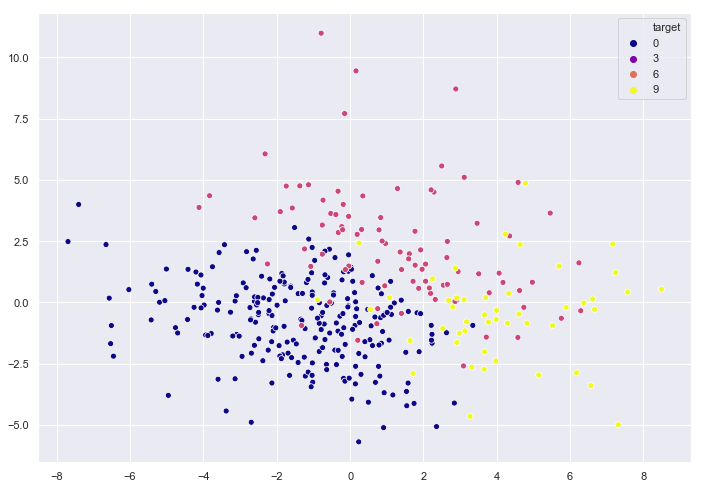

In [18]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=DF['target'],palette="plasma",ax=ax)

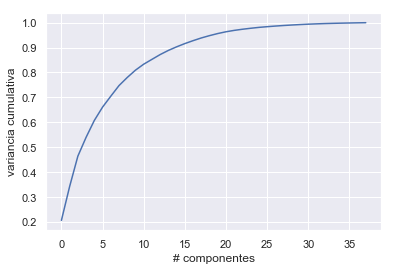

In [19]:
## Variância em função do número do componente principal

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# componentes')
plt.ylabel('variancia cumulativa');

In [20]:
## Variância explicada pelos 15 primeiros componentes

np.cumsum(pca.explained_variance_ratio_)[14]

0.9028188740287139

## Reavaliação dos modelos

In [21]:
x=x_pca
y = DF['target']

In [22]:
## KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn_score = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)
    knn.fit(x_train,y_train)
    knn_predicts = knn.predict(x_test)
    knn_score.append(metrics.accuracy_score(y_test,knn_predicts))
sum(knn_score)/100

0.8490666666666665

In [23]:
## Regressão logística 

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_score = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)
    logreg.fit(x_train,y_train)
    logreg_predicts = logreg.predict(x_test)
    logreg_score.append(metrics.accuracy_score(y_test,logreg_predicts))
sum(logreg_score)/100

0.9425333333333334

In [24]:
## svm

from sklearn import svm
svm = svm.SVC()
svm_score = []

for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)
    svm.fit(x_train,y_train)
    svm_predicts = svm.predict(x_test)
    svm_score.append(metrics.accuracy_score(y_test,logreg_predicts))
sum(svm_score)/100

0.4313333333333332

### Conclusões:
- A análise de componentes principais aumentou significativamente a performace dos algoritmos de KNN e regressão logistica, sendo este o de melhor resultado.


- Também demonstrou que os quinze primeiros compenentes principais são capazes de explicar mais de 90% da variabilidade do sistema, sugerindo que vários atributos podem não ser tão relevantes. 


- o Scatter plot demosntra que o PCA conseguiu promover uma separação razoável das classes em seus dois primeiro componentes, mas ainda há superposição de alguns clusters, principalmente as classes 5 e 9.

### Para trabalhos futuros
- Aplicar engenharia de atributos para descartar features irrelevantes. Isso poderia evitar overfiting, descomplicar as análises e aumentar a quantidade de exemplos de treino, pois vários deles foram descartados pela função ".dropna()" por conterem valors "NaN" em atributos potencialmente descartáveis.


- Aplicar Linear Discriminant Analysis (LDA) ao invés de PCA pode ter uma porformace melhor para separar os clusters das classes e culminar em melhor performance para os algoritmos.